In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import cv2
from sklearn.model_selection import train_test_split

np.random.seed(0)


In [206]:
# Load data into dataframe
training_data_folder = 'asl_alphabet_train1'
data = []

for folder in sorted(os.listdir(training_data_folder)):
    sub_folder = os.path.join(training_data_folder,folder)
    files = [{'label':folder,'path':os.path.join(sub_folder, f)} for f in os.listdir(sub_folder) if os.path.isfile(os.path.join(sub_folder, f))]
    data += files

df = pd.DataFrame(data)

In [207]:

# df.head()

In [208]:
# df.tail()

In [209]:
df.to_csv("labelPath.csv",index=False)

In [210]:
df2 = pd.read_csv('labelPath.csv')
df2.head()

,label,path
0,A,asl_alphabet_train1\A\A1.jpg
1,A,asl_alphabet_train1\A\A10.jpg
2,A,asl_alphabet_train1\A\A100.jpg
3,A,asl_alphabet_train1\A\A1000.jpg
4,A,asl_alphabet_train1\A\A1001.jpg


In [211]:
# len(df2) # 3000*29

In [212]:
map_characters = {0: 'A',  1: 'M', 2: 'N', 3: 'S', 4: 'T' }

# map_characters
order_list=('A', 'M',  'N',  'S', 'T')

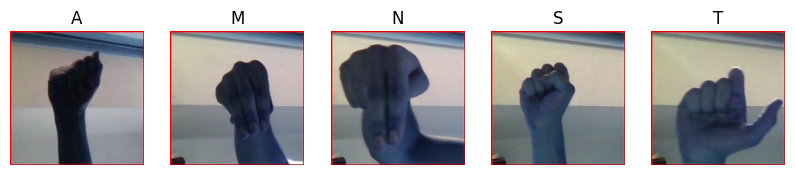

In [213]:

plt.figure(figsize=(10, 15))
for i in range(5):
    path=df2.loc[i*3000, "path"]
    label=df2.loc[i*3000, "label"]
    ax = plt.subplot(6,5 , i + 1)
    plt.imshow(cv2.imread(path),cmap=plt.cm.binary)
    plt.title(label)
    plt.axis("off")
plt.show()
    

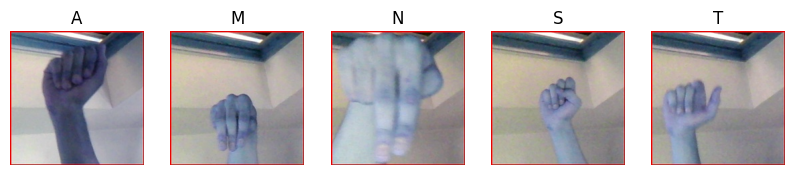

In [214]:
plt.figure(figsize=(10, 15))
for i in range(5):
    path=df2.loc[i*3000+200, "path"]
    label=df2.loc[i*3000+200, "label"]
    ax = plt.subplot(6,5 , i + 1)
    plt.imshow(cv2.imread(path),cmap=plt.cm.binary)
    plt.title(label)
    plt.axis("off")
plt.show()

In [215]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
# y_train=lb.fit_transform(train_label)
# y_test=lb.fit_transform(test_label)
# hotEncodedLabels=lb.fit_transform(df2['label'])
hotEncodedLabels=lb.fit_transform(order_list)



In [216]:
hotEncodedLabels

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [217]:
len(hotEncodedLabels)

5

In [218]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [219]:
train_dir="asl_alphabet_train1"

labels_dict = {'A':0,'M':1,'N':2,'S':3,'T':4}


map_characters = {0: 'A',  1: 'M', 2: 'N', 3: 'S', 4: 'T' }


def load_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder in os.listdir(train_dir):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image, 0) # greyscale
            temp_img = cv2.resize(temp_img, size)
            temp_img = temp_img.flatten()
            images.append(temp_img)
            labels.append(hotEncodedLabels[labels_dict[folder]])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)
    X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.8,random_state=42)
    
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_validation),'images for validation','validation data shape =',X_validation.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

    
    return X_train, X_test, Y_train, Y_test, X_validation, Y_validation

In [220]:
X_train, X_test, Y_train, Y_test, X_validation, Y_validation= load_data()

LOADING DATA FROM : A | M | N | S | T | 
Loaded 10500 images for training, Train data shape = (10500, 4096)
Loaded 3600 images for validation validation data shape = (3600, 4096)
Loaded 900 images for testing Test data shape = (900, 4096)


In [221]:
print(X_train[0])
print(len(X_train[0]))


[0.10980392 0.13333334 0.1254902  ... 0.49019608 0.49019608 0.47843137]
4096


In [222]:
Y_train[0]

array([0, 0, 0, 1, 0])

In [223]:
print(len(X_train))
print(len(Y_train))

10500
10500


In [224]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)

In [ ]:
categories = 5
features= 4096
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, categories])
W = tf.Variable(tf.zeros([features,categories]))
b = tf.Variable(tf.zeros([categories]))

z = tf.matmul(x, W) +b 
pred = tf.nn.softmax(z) 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y_, z))
update = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

data_x=np.array(X_train)
data_y=np.array(Y_train)


    


In [ ]:
print(len(data_x))
print(len(data_y))

10500
10500


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(len(data_x)):
	sess.run(update, feed_dict = {x:data_x, y_:data_y}) 
	if i%1000 == 0:
		print(i)

line=["w"]
my_w=sess.run(W)
for i in range(len(my_w)):
	line.append(str(my_w[i]))
line.append("b")
my_b=sess.run(b)
for i in range(len(my_b)):
	line.append(str(my_b[i]))

with open('weights_and_b_5_class_28_11_1epoch.txt', 'w') as f:
	for l in line:
		f.write(l)
		f.write('\n')	
	



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
print(sess.run(W).shape)
print(sess.run(W))


(4096, 5)
[[-0.0069477   0.00459823  0.00686655 -0.00105327 -0.00346381]
 [-0.00480679 -0.00022619  0.00417505 -0.00134137  0.0021993 ]
 [-0.0048021  -0.00157286  0.0036454  -0.00173652  0.0044661 ]
 ...
 [ 0.02868372 -0.03227682 -0.0301244   0.01847589  0.01524158]
 [ 0.02815182 -0.03386701 -0.03172544  0.01982775  0.01761288]
 [ 0.02262362 -0.03672466 -0.03163387  0.02416514  0.02156973]]


In [ ]:
print(sess.run(b).shape)
print(sess.run(b))

(5,)
[-0.05381758 -0.01840268  0.03464147 -0.00931894  0.04689767]


In [ ]:
pred=tf.nn.softmax(sess.run(z, feed_dict = {x:X_validation}))
print(pred)
print(sess.run(pred))


Tensor("Softmax_14:0", shape=(3600, 5), dtype=float32)
[[4.9300533e-02 2.5316554e-01 5.4873216e-01 8.9110672e-02 5.9691008e-02]
 [5.8272195e-01 1.3281304e-01 1.5077944e-01 7.0535421e-02 6.3150242e-02]
 [2.5132494e-02 6.1455101e-02 8.2424319e-01 5.4903448e-02 3.4265842e-02]
 ...
 [7.2884969e-02 2.3232462e-01 1.1344278e-01 2.3062325e-01 3.5072440e-01]
 [9.1678846e-01 7.0065521e-02 8.9077037e-03 7.2172983e-04 3.5166268e-03]
 [8.4635824e-01 1.5568543e-02 7.9125889e-02 4.7677793e-02 1.1269413e-02]]


In [ ]:
y_vald=[]
for i in Y_validation:
    y_vald.append(i.tolist())

In [ ]:
y_vald_t=tf.convert_to_tensor(
    y_vald, dtype=None, dtype_hint=None, name=None
)

In [ ]:
y_vald_t

<tf.Tensor 'Const_43:0' shape=(3600, 5) dtype=int32>

In [ ]:
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_vald_t,1))
accuracy1 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy1))

0.6591667


In [ ]:
# accuracy=0

# for j in range(len(X_validation)):
#     test1=sess.run(pred[j])
#     maxx =0
#     spot =0
#     p_val=np.argmax(test1)
#     pred_val=map_characters[p_val]
#     t_val=np.argmax(Y_validation[j])

#     true_val=map_characters[t_val]
#     if pred_val==true_val:
#         accuracy+=1
#     if j%1000==0:
#         print(j)
# print("accuracy= ",accuracy/len(X_validation))


In [ ]:
saver = tf.train.Saver()
saver.save(sess, "5class_1epoch_28_11")
saver.restore(sess, "5class_1epoch_28_11")


INFO:tensorflow:Restoring parameters from 5class_1epoch_28_11


In [ ]:
# tf.compat.v1.metrics.accuracy(
#     Y_validation,
#     pred,
#     weights=None,
#     metrics_collections=None,
#     updates_collections=None,
#     name=None
# )


In [225]:
y_tr=[]
for i in Y_train:
    y_tr.append(i.tolist())
y_train_t=tf.convert_to_tensor(
    y_tr, dtype=None, dtype_hint=None, name=None
)

X_tr=[]
for i in X_train:
    X_tr.append(i.tolist())
X_train_t=tf.convert_to_tensor(
    X_tr, dtype=None, dtype_hint=None, name=None
)

y_vald=[]
for i in Y_validation:
    y_vald.append(i.tolist())
y_vald_t=tf.convert_to_tensor(
    y_vald, dtype=None, dtype_hint=None, name=None
)

In [230]:


(hidden1_size, hidden2_size) = (1024, 256)
x = tf.placeholder(tf.float32, [None, 4096])
y_ = tf.placeholder(tf.float32, [None, 5])
W1 = tf.Variable(tf.truncated_normal([4096, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)
W3 = tf.Variable(tf.truncated_normal([hidden2_size, 5], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[5]))
pred = tf.nn.softmax(tf.matmul(z2, W3) + b3)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)




sess1 = tf.Session()
sess1.run(tf.global_variables_initializer())

correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
for i in range (5):
    for j in range(len(X_train)):
        # sess1.run(train_step, feed_dict={x: X_tr, y_: y_tr})
        sess1.run(train_step, feed_dict={x: X_train, y_: Y_train})
        if j%1000==0:
            print(j)
    print(i, sess1.run(accuracy, feed_dict={x: X_validation, y_: Y_validation}))


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
0 0.9075
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
1 0.955
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
2 0.97083336
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
3 0.97583336
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
4 0.9802778


In [ ]:
# 0 0.28083333
# 1 0.30194443
# 2 0.31416667
# 3 0.33083335
# 4 0.34583333

In [231]:
saver = tf.train.Saver()
saver.save(sess1, "5class_1024_256_5epoch")
saver.restore(sess1, "5class_1024_256_5epoch")


INFO:tensorflow:Restoring parameters from 5class_1024_256_5epoch
